<a href="https://colab.research.google.com/github/graceebc9/Arch_Class/blob/main/train_svi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train DCNN on facades for architecture Classification 


In [23]:
!pip install wandb
import wandb
!pip install pytorch_lightning 
import pytorch_lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:


#Store the PyTorch Lightning Data Modules and Model Classes 

import pytorch_lightning as pl
from pytorch_lightning import LightningDataModule ,Callback
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.loggers import WandbLogger
import wandb
from torch.utils.data import Dataset, DataLoader
from torchvision import  utils
import torchvision.transforms as T
import torchvision
import torchvision.models as models
import torch.optim as optim
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

torch.manual_seed(17)

import seaborn as sn
import matplotlib.pyplot as plt


from torchmetrics.classification import Accuracy, Recall
from torchmetrics import Precision, JaccardIndex, ConfusionMatrix
from torch.nn import  NLLLoss


import numpy as np
import glob
import random

import sys
from PIL import Image
import random
import os
import glob


from pytorch_lightning.callbacks import ModelCheckpoint

import torchvision.models as models
import torch
import pandas as pd
import wandb 
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
import pytorch_lightning as pl


import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [26]:
base_dir = '/content/gdrive/MyDrive'

import sys
sys.path.insert(0, base_dir + '/HurricanDamage_Data')

from src import  ImagePredictionLogger, ImagePredictionLogger_table, extract_predictions

In [27]:


import os
from typing import Tuple
import os
from typing import Optional
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

import torchvision.transforms as T

import torch
from torch.autograd import Variable as V
import torchvision.models as models
from torchvision import transforms as trn
from torch.nn import functional as F
import os
import pytorch_lightning as pl

import torch
import torch.nn as nn
import torchvision.models as models

import numpy as np
from typing import Optional

import os
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler



In [28]:

gdf = pd.read_csv('/content/gdrive/MyDrive/Non_Trads_FOI/data/full_svi/gdf.csv')
gdf.drop(columns=['Unnamed: 0'], inplace=True)

In [29]:

gdf.head()

,UPRN,Address,raw_Construction_type,Processed_Construction_Type,Other_Attributes,BRE_mapping_matches,BRE_Class,Latitude,Longitude,id_string,unique_id,latlong_id
0,1019030,36 HERTFORD ROAD Kettering,cornish,cornish,NaN,Cornish Unit Type I,PCC,52.380445,-0.715830,36 HERTFORD ROAD KetteringcornishPCC52.3804451...,77f9bf6a278eedb0a885afd3cb2461599c8b21a67a6dc8...,bb16f6ffaafd43370c7249fc87c4e271c030e3448d44ee...
1,1019052,38 HERTFORD ROAD Kettering,cornish,cornish,NaN,Cornish Unit Type I,PCC,52.380388,-0.715630,38 HERTFORD ROAD KetteringcornishPCC52.3803877...,03f9dceb5b7270f2bf4ab07a07c53cc1740b35b7b4be60...,a0150d9c1ae29738c7f34063e5a62dffcda87a624235dc...
2,1019063,40 HERTFORD ROAD Kettering,cornish,cornish,NaN,Cornish Unit Type I,PCC,52.380400,-0.715434,40 HERTFORD ROAD KetteringcornishPCC52.3804001...,751ee5f91b9c585a6413bb601a18d8c9f1bbd6044504cd...,aca3c54403965ccb9fd68a9ed64e3b24e97bf6c45a6b39...
3,1019085,42 HERTFORD ROAD Kettering,cornish,cornish,NaN,Cornish Unit Type I,PCC,52.380395,-0.715382,42 HERTFORD ROAD KetteringcornishPCC52.3803953...,50ad2f9eb902280589f3468843496ca84bc0772bfe6b3a...,559ef382202b9b3ed28e6457f025da354a02920d95b82e...
4,1019096,44 HERTFORD ROAD Kettering,cornish,cornish,NaN,Cornish Unit Type I,PCC,52.380358,-0.715236,44 HERTFORD ROAD KetteringcornishPCC52.3803576...,04ed396a7e8fdfc9b41ca9509115ae26d701b77559c770...,8d471ab3d2a1c995d53463dbfe0622c88a02e24297cfcd...


In [ ]:


# class StreetViewData_test(Dataset):
#     """
#     Module for the street view data stored in folders 
#     """
#     def __init__(self, root_dir: str, transform: Optional[transforms.Compose] = None):
#         self.root_dir = root_dir
#         self.transform = transform

#         self.classes = os.listdir(root_dir)
#         self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
#         self.idx_to_classes = {str(i): cls_name for i, cls_name in enumerate(self.classes)}

#         self.samples = []

#         print(self.classes)
#         for class_name in self.classes:
#             class_dir = os.path.join(self.root_dir, class_name)
#             for i in range(3700):
                
#                 sample_path = os.path.join(class_dir, f"gsv_{i}.jpg")
#                 if not os.path.exists(sample_path):
#                     None
#                 else:
#                     self.samples.append((sample_path, self.class_to_idx[class_name]))
               

#     def classes_dict(self):
#       return self.idx_to_classes

#     def __len__(self):
#         return len(self.samples)

#     def __getitem__(self, index):
#         sample_path, label = self.samples[index]

#         with open(sample_path, "rb") as f:
#             sample = Image.open(f).convert("RGB")
#             left = 170
#             top = 250
#             right = 430
#             bottom = 10
#             sample = sample.crop((left, bottom, right, top))

#         if self.transform:
#             sample = self.transform(sample)

#         return sample, label

# class MyDataModule_test(pl.LightningDataModule):
#     def __init__(self, data_dir, batch_size, transform=None, num_workers=4):
#         super().__init__()
#         self.data_dir = data_dir
#         self.batch_size = batch_size
#         self.num_workers = num_workers
#         self.transform = T.Compose([ T.Resize( size = (224, 224) ), T.ToTensor() ])       
#         self.dataset = StreetViewData(data_dir, self.transform)

       
        

#     def setup(self, stage=None): 
#         # split into train, val, and test sets
#         num_samples = len(self.dataset)
#         indices = list(range(num_samples))
#         split_train = int(np.floor(0.7 * num_samples))
#         split_val = int(np.floor(0.15 * num_samples))
#         np.random.shuffle(indices)
#         train_indices, val_indices, test_indices = indices[:split_train], indices[split_train:split_train+split_val], indices[split_train+split_val:]
#         print('Num train:{} Num val:{} Num test:{}'.format(len(train_indices), len(val_indices), len(test_indices)) )
#         print('total num: {}  total sum: {}'.format(num_samples, (len(train_indices)+ len(val_indices)+ len(test_indices))))
#         # define samplers
#         train_sampler = SubsetRandomSampler(train_indices)
#         val_sampler = SubsetRandomSampler(val_indices)
#         test_sampler = SubsetRandomSampler(test_indices)

        
#         # set up data loaders
#         self.train_loader = DataLoader(self.dataset, batch_size=self.batch_size,
#                                         sampler=train_sampler, num_workers=self.num_workers)
#         self.val_loader = DataLoader(self.dataset, batch_size=self.batch_size,
#                                         sampler=val_sampler, num_workers=self.num_workers)
#         self.test_loader = DataLoader(self.dataset, batch_size=self.batch_size,
#                                       sampler=test_sampler, num_workers=self.num_workers)
    
    

#     def train_dataloader(self):
#         return self.train_loader

#     def val_dataloader(self):
#         return self.val_loader

#     def test_dataloader(self):
#         return self.test_loader


In [123]:



class StreetViewData(Dataset):
    """
    Module for flexi data stored in flat structure with labels stored in gdf dataframe 
    """
    def __init__(self, root_dir: str, pred_only: bool, transform: Optional[transforms.Compose] = None, svi_raw: bool = True ):
        
        self.root_dir = root_dir
        self.transform = transform
        self.pred_only= pred_only 
        self.svi_raw = svi_raw
        type_sv = 'brand' # bre_class

        if type_sv == 'brand':
          top_classes = ['Wimpey No-Fines',
                        'Reema Conclad',
                        'BISF Type A1',
                        'Mowlem',
                        'Timber Frame (UK)',
                        'Orlit Type I',
                        'Easiform Type I',
                        'Wates',
                        'Weir No-Fines',
                        'Blackburn',
                        'Cornish Unit Type I',
                        'Airey',
                        'Concrete   ',
                        'Bison Trimline',
                        'Unity Type I',
                        'Shepherd',
                        'EDLO BRS',
                        'Parkinson',
                        'Aberdeen Corporation',
                        'Belfry']
          groupin_col = 'BRE_mapping_matches'
        
        elif type_sv =='bre_class':
          top_classes =['PCC', 'ISC', 'TIM', 'MET']
          groupin_col = 'BRE_Class'
        else:
          print('error - which grouping? ')
      
        grouped = gdf.groupby(['Latitude', 'Longitude', 'latlong_id'])[groupin_col].agg(lambda x:x.value_counts().index[0]).reset_index()
        self.classes = top_classes # grouped[groupin_col].unique().tolist()
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        self.idx_to_classes = {str(i): cls_name for i, cls_name in enumerate(self.classes)}
        print(self.classes)
        
        
        self.samples = []
        list_samples = os.listdir(self.root_dir) 
        
        if self.pred_only is False:
          ids = [x.split('_')[0] for x in list_samples] 
          labels = [ grouped[grouped['latlong_id'] == x][groupin_col].values  for x in ids ]
        else:
          list_samples = [x for x in list_samples if x[-4:] =='.jpg' ]
          ids = [x.split('_')[0] for x in list_samples] 
          labels = ['-999' for x in ids]
        
        for s, label in zip(list_samples, labels) :
        
            if self.pred_only is False:
              if label in top_classes:
                    sample_path = os.path.join(self.root_dir, s)
                    if not os.path.exists(sample_path):
                        None
                    else:
                        self.samples.append((sample_path, self.class_to_idx[label[0]]))
              
            else:
              sample_path = os.path.join(self.root_dir, s)
              if not os.path.exists(sample_path):
                    None
              else:
                    self.samples.append((sample_path, label))
        print('len samples : {}'.format(len(self.samples) ))        


    def classes_dict(self):
      return self.idx_to_classes

    def __len__(self):
        return len(self.samples)

    

    def __getitem__(self, index):
        
        sample_path, label = self.samples[index]

        with open(sample_path, "rb") as f:
            sample = Image.open(f).convert("RGB")
            if self.svi_raw ==True:
                left = 170
                top = 250
                right = 430
                bottom = 10
                sample =  sample.crop((left, bottom, right, top))

        if self.transform:
            sample = self.transform(sample)
        if self.pred_only is True:
          return sample 
        else:
          return sample, label 
    
    def get_list_samples(self):
        return self.samples

        


class MyDataModule(pl.LightningDataModule):
    def __init__(self, data_dir, batch_size, transform=None, num_workers=4, pred_only=False, svi_raw = True):
        super().__init__()
        self.data_dir = data_dir
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.transform = T.Compose([ T.Resize( size = (224, 224) ), T.ToTensor() ])       
        self.pred_only = pred_only
        self.svi_raw = svi_raw
        self.dataset = StreetViewData(data_dir, transform = self.transform, pred_only =  self.pred_only, svi_raw = self.svi_raw)
        
       
        

    def setup(self, stage=None): 
        num_samples = len(self.dataset)
        indices = list(range(num_samples))
        split_train = int(np.floor(0.7 * num_samples))
        split_val = int(np.floor(0.15 * num_samples))
        np.random.shuffle(indices)
        train_indices, val_indices, test_indices = indices[:split_train], indices[split_train:split_train+split_val], indices[split_train+split_val:]
       
        
        if self.pred_only is False:
          print('Num train:{} Num val:{} Num test:{}'.format(len(train_indices), len(val_indices), len(test_indices)) )
          print('Total num: {}  total sum: {}'.format(num_samples, (len(train_indices)+ len(val_indices)+ len(test_indices))))
        # define samplers
        train_sampler = SubsetRandomSampler(train_indices)
        val_sampler = SubsetRandomSampler(val_indices)
        # set up data loaders
        self.train_loader = DataLoader(self.dataset, batch_size=self.batch_size, sampler=train_sampler, num_workers=self.num_workers)
        self.val_loader = DataLoader(self.dataset, batch_size=self.batch_size, sampler=val_sampler, num_workers=self.num_workers)

        test_sampler = SubsetRandomSampler(test_indices)
        self.test_loader = DataLoader(self.dataset, batch_size=self.batch_size, sampler=test_sampler, num_workers=self.num_workers)
    
        print('Data modules for predict only')
        if self.pred_only is True:
          print('Pred only, num of samples = {}'.format(num_samples) )
        self.predict_loader = DataLoader(self.dataset, batch_size=self.batch_size, num_workers=self.num_workers)
    
                                       


    def train_dataloader(self):
        return self.train_loader

    def val_dataloader(self):
        return self.val_loader

    def test_dataloader(self):
        return self.test_loader
    
    def predict_dataloader(self):
        return self.predict_loader
  

    def get_dataset_samples(self):
        #pull list of samples from SVi dataset 
        return self.dataset.get_list_samples()


In [ ]:

gdf.head()

,UPRN,Address,raw_Construction_type,Processed_Construction_Type,Other_Attributes,BRE_mapping_matches,BRE_Class,Latitude,Longitude,id_string,unique_id,latlong_id
0,1019030,36 HERTFORD ROAD Kettering,cornish,cornish,NaN,Cornish Unit Type I,PCC,52.380445,-0.715830,36 HERTFORD ROAD KetteringcornishPCC52.3804451...,77f9bf6a278eedb0a885afd3cb2461599c8b21a67a6dc8...,bb16f6ffaafd43370c7249fc87c4e271c030e3448d44ee...
1,1019052,38 HERTFORD ROAD Kettering,cornish,cornish,NaN,Cornish Unit Type I,PCC,52.380388,-0.715630,38 HERTFORD ROAD KetteringcornishPCC52.3803877...,03f9dceb5b7270f2bf4ab07a07c53cc1740b35b7b4be60...,a0150d9c1ae29738c7f34063e5a62dffcda87a624235dc...
2,1019063,40 HERTFORD ROAD Kettering,cornish,cornish,NaN,Cornish Unit Type I,PCC,52.380400,-0.715434,40 HERTFORD ROAD KetteringcornishPCC52.3804001...,751ee5f91b9c585a6413bb601a18d8c9f1bbd6044504cd...,aca3c54403965ccb9fd68a9ed64e3b24e97bf6c45a6b39...
3,1019085,42 HERTFORD ROAD Kettering,cornish,cornish,NaN,Cornish Unit Type I,PCC,52.380395,-0.715382,42 HERTFORD ROAD KetteringcornishPCC52.3803953...,50ad2f9eb902280589f3468843496ca84bc0772bfe6b3a...,559ef382202b9b3ed28e6457f025da354a02920d95b82e...
4,1019096,44 HERTFORD ROAD Kettering,cornish,cornish,NaN,Cornish Unit Type I,PCC,52.380358,-0.715236,44 HERTFORD ROAD KetteringcornishPCC52.3803576...,04ed396a7e8fdfc9b41ca9509115ae26d701b77559c770...,8d471ab3d2a1c995d53463dbfe0622c88a02e24297cfcd...


In [85]:



class TransferLearning(pl.LightningModule):
    """
        Transfer learning data modules, works for ResNet Architectures 
        model: pytorch Resnet18 / 50 etc 
    """

    def __init__(self, model, learning_rate, optimiser = 'Adam', class_names=None, num_classes = None):
        super().__init__()
        
        self.optimiser = optimiser
        self.thresh  =  0.5
        self.save_hyperparameters()
        self.learning_rate = learning_rate
        self.class_names = class_names
        self.num_classes = len(self.class_names)
        
        #add metrics for tracking 
        self.accuracy = Accuracy(task= 'multiclass', num_classes=self.num_classes)
        self.loss= nn.CrossEntropyLoss()
        self.recall = Recall(task= 'multiclass', num_classes=self.num_classes, threshold=self.thresh, average ='macro')
        self.prec = Precision( task= 'multiclass', num_classes=self.num_classes, average='macro')
        self.jacq_ind = JaccardIndex(task= 'multiclass', num_classes=self.num_classes)
        self.confmat = ConfusionMatrix(task="multiclass", num_classes=self.num_classes)


        # init model
        backbone = model
        num_filters = backbone.fc.in_features
        layers = list(backbone.children())[:-1]
        self.feature_extractor = nn.Sequential(*layers)

        # use the pretrained model to classify damage 2 classes
        
        self.classifier = nn.Linear(num_filters, self.num_classes)

    def forward(self, x):
        self.feature_extractor.eval()
        with torch.no_grad():
            representations = self.feature_extractor(x).flatten(1)
        x = self.classifier(representations)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = self.loss(logits, y)
        
        # training metrics
        preds = torch.argmax(logits, dim=1)
        acc = self.accuracy(preds, y)
        recall = self.recall(preds, y)
        precision = self.prec(preds, y)
        jac = self.jacq_ind(preds, y)
        

        wandb.log({"train_loss": loss})   
        self.log('train_loss', loss, on_step=True, on_epoch=True, logger=True)
        self.log('train_acc', acc, on_step=True, on_epoch=True, logger=True)
        self.log('train_recall', recall, on_step=True, on_epoch=True, logger=True)
        self.log('train_precision', precision, on_step=True, on_epoch=True, logger=True)
        self.log('train_jacc', jac, on_step=True, on_epoch=True, logger=True)
        
        return loss
  
    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = self.loss(logits, y)

        # validation metrics
        preds = torch.argmax(logits, dim=1)
        acc = self.accuracy(preds, y)
        recall = self.recall(preds, y)
        precision = self.prec(preds, y)
        jac = self.jacq_ind(preds, y)
        self.confmat.update(preds, y)
        
        

        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)
        self.log('val_recall', recall, prog_bar=True)
        self.log('val_precision', precision, prog_bar=True)
        self.log('val_jacc', jac, prog_bar=True)
        
        return  loss
      

    def on_validation_epoch_end(self):
        confmat = self.confmat.compute()
        class_names = self.class_names
        num_classes = len(class_names)

        df_cm = pd.DataFrame(confmat.cpu().numpy() , index = [i for i in class_names], columns = [i for i in class_names])
        df_cm.to_csv('raw_nums.csv') # used this to validate the number of val samples
        print('Num of val samples: {}. Check this aligns with the numbers from the dataloader'.format(df_cm.sum(axis=1).sum() ))
        #normalise the confusion matrix 
        norm =  np.sum(df_cm, axis=1)
        normalized_cm = (df_cm.T/norm).T
        #validate the confusion matrix sums to num of classes
       
          

        normalized_cm.to_csv('norm_cdf.csv') 
        #log to wandb
        f, ax = plt.subplots(figsize = (15,10)) 
        sn.heatmap(normalized_cm, annot=True, ax=ax)
        wandb.log({"Validation Confusion Matrix ": wandb.Image(f) })
        self.confmat.reset()  #This was NEEDED otherwise the confusion matrix kept stacking the results

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = self.loss(logits, y)
        
        # validation metrics
        preds = torch.argmax(logits, dim=1)
        acc = self.accuracy(preds, y)
        recall = self.recall(preds, y)
        precision = self.prec(preds, y)
        jac = self.jacq_ind(preds, y)
        # confmat = self.confmat(preds, y)

        self.log('test_loss', loss, prog_bar=True)
        self.log('test_acc', acc, prog_bar=True)
        self.log('test_recall', recall, prog_bar=True)
        self.log('test_precision', precision, prog_bar=True)
        self.log('test_jacc', jac, prog_bar=True)
         
        # self.log('test_conf', confmat, on_step=False, on_epoch=True, logger=True)

        return loss

    def predict_step(self, batch, batch_idx, dataloader_idx=0):
        x = batch
        logits = self(x)
        preds = torch.argmax(logits, dim=1) 
        return preds, x

    def configure_optimizers(self,):
        print('Optimise with {}'.format(self.optimiser) )
        # optimizer = self.optimiser_dict[self.optimiser](self.parameters(), lr=self.learning_rate)
                
                # Support Adam, SGD, RMSPRop and Adagrad as optimizers.
        if self.optimiser == "Adam":
            optimiser = optim.AdamW(self.parameters(), lr = self.learning_rate)
        elif self.optimiser == "SGD":
            optimiser = optim.SGD(self.parameters(), lr = self.learning_rate)
        elif self.optimiser == "Adagrad":
            optimiser = optim.Adagrad(self.parameters(), lr = self.learning_rate)
        elif self.optimiser == "RMSProp":
            optimiser = optim.RMSprop(self.parameters(), lr = self.learning_rate)
        else:
            assert False, f"Unknown optimizer: \"{self.optimiser}\""

        return optimiser


# Train Model 

In [114]:
#this method gets all the list of samples 
len(dm.get_dataset_samples())

7796

In [112]:

dm = MyDataModule(data_dir="/content/gdrive/MyDrive/Non_Trads_FOI/data/full_svi/all_images", batch_size=32)
dm.setup()

train_dataloader = dm.train_dataloader()
val_dataloader = dm.val_dataloader()

['Wimpey No-Fines', 'Reema Conclad', 'BISF Type A1', 'Mowlem', 'Timber Frame (UK)', 'Orlit Type I', 'Easiform Type I', 'Wates', 'Weir No-Fines', 'Blackburn', 'Cornish Unit Type I', 'Airey', 'Concrete   ', 'Bison Trimline', 'Unity Type I', 'Shepherd', 'EDLO BRS', 'Parkinson', 'Aberdeen Corporation', 'Belfry']
Num train:5457 Num val:1169 Num test:1170
Total num: 7796  total sum: 7796
Data modules for predict only


In [75]:
#Parameters set for our Final Model config; using ResNet50 architecture
bs = 160
LR = 0.006607
optimiser = 'Adam'


model = TransferLearning(model=models.resnet50(weights='DEFAULT'), learning_rate = LR, optimiser = optimiser, class_names = dm.dataset.classes , ) #



/usr/local/lib/python3.9/dist-packages/pytorch_lightning/utilities/parsing.py:197: UserWarning: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
  rank_zero_warn(


In [76]:
#needed for the val and test image loggers
# val_samples = next(iter(val_dataloader ))
# test_samples = next(iter(dm.test_shuffle_dataloader()))

wand_proj_name = 'full_svi'

wandb.init(project= wand_proj_name, entity='grace_ebc')

# #set up logger
wandb_logger = WandbLogger( job_type='train' )



#set up our wandb trainer 
trainer = pl.Trainer(
                        max_epochs=50,
                     default_root_dir = '/content/gdrive/MyDrive/Non_Trads_FOI/models',
                        logger=wandb_logger,
                        callbacks=[
                          ModelCheckpoint(
                                          save_weights_only=True, mode="max", monitor="val_acc"),
                                  #  ImagePredictionLogger(val_samples), 
                                  #  ImagePredictionLogger_table( val_samples, 'val' ),
                                  #  ImagePredictionLogger_table(test_samples, 'test'),
                                  EarlyStopping(monitor="train_loss", min_delta=0.00, patience=3, verbose=False, mode="max")
                                  ]

                        )  


epoch,▁▃▆█
train_acc_epoch,▁███
train_jacc_epoch,▁███
train_loss,█▄▂▁
train_loss_epoch,█▄▂▁
train_precision_epoch,▁███
train_recall_epoch,▁███
trainer/global_step,▁▃▆█
epoch,3
train_acc_epoch,1.0
train_jacc_epoch,0.1


/usr/local/lib/python3.9/dist-packages/pytorch_lightning/loggers/wandb.py:395: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.callbacks.model_summary:
  | Name              | Type                      | Params
----------------------------------------------------------------
0 | accuracy          | MulticlassAccuracy        | 0     
1 | loss              | CrossEntropyLoss          | 0     
2 | recall            | MulticlassRecall          | 0     
3 | prec              | MulticlassPrecision       | 0     
4 | jacq_ind          | MulticlassJaccardIndex    | 0     
5 | confmat           | MulticlassConfusionMatrix | 0     
6 | feature_extractor | Sequential                | 23.5 M
7 | classifier        | Linear                    | 41.0 K
----------------------------------------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
94.196    Total estimated model params size (MB)


Num train:4 Num val:1 Num test:2
Total num: 7  total sum: 7
Data modules for predict only
Optimise with Adam


Sanity Checking: 0it [00:00, ?it/s]

Num of val samples: 1. Check this aligns with the numbers from the dataloader


/usr/local/lib/python3.9/dist-packages/pytorch_lightning/loops/fit_loop.py:280: PossibleUserWarning: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Num of val samples: 1. Check this aligns with the numbers from the dataloader


Validation: 0it [00:00, ?it/s]

Num of val samples: 1. Check this aligns with the numbers from the dataloader


Validation: 0it [00:00, ?it/s]

Num of val samples: 1. Check this aligns with the numbers from the dataloader


Validation: 0it [00:00, ?it/s]

Num of val samples: 1. Check this aligns with the numbers from the dataloader


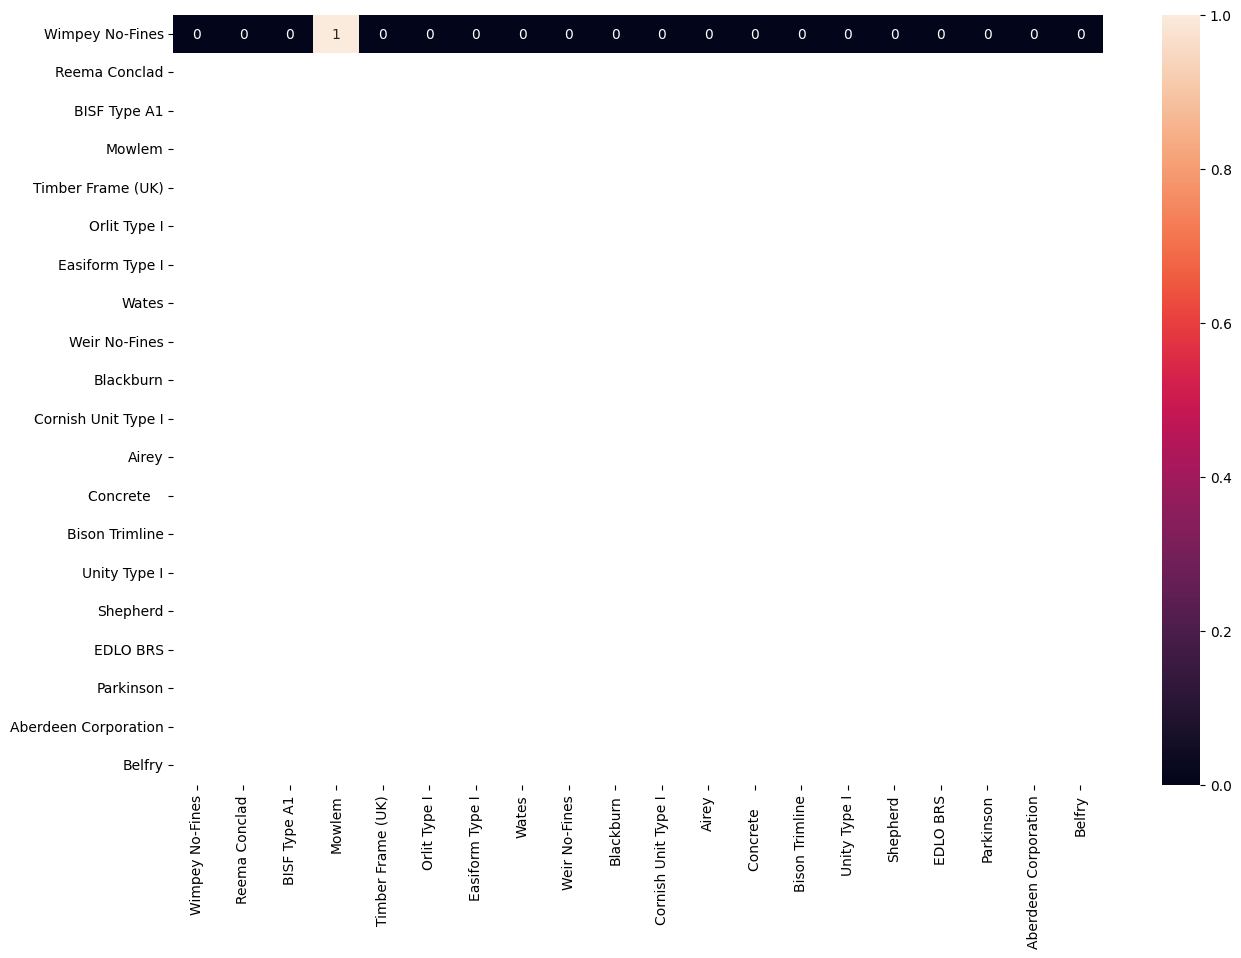

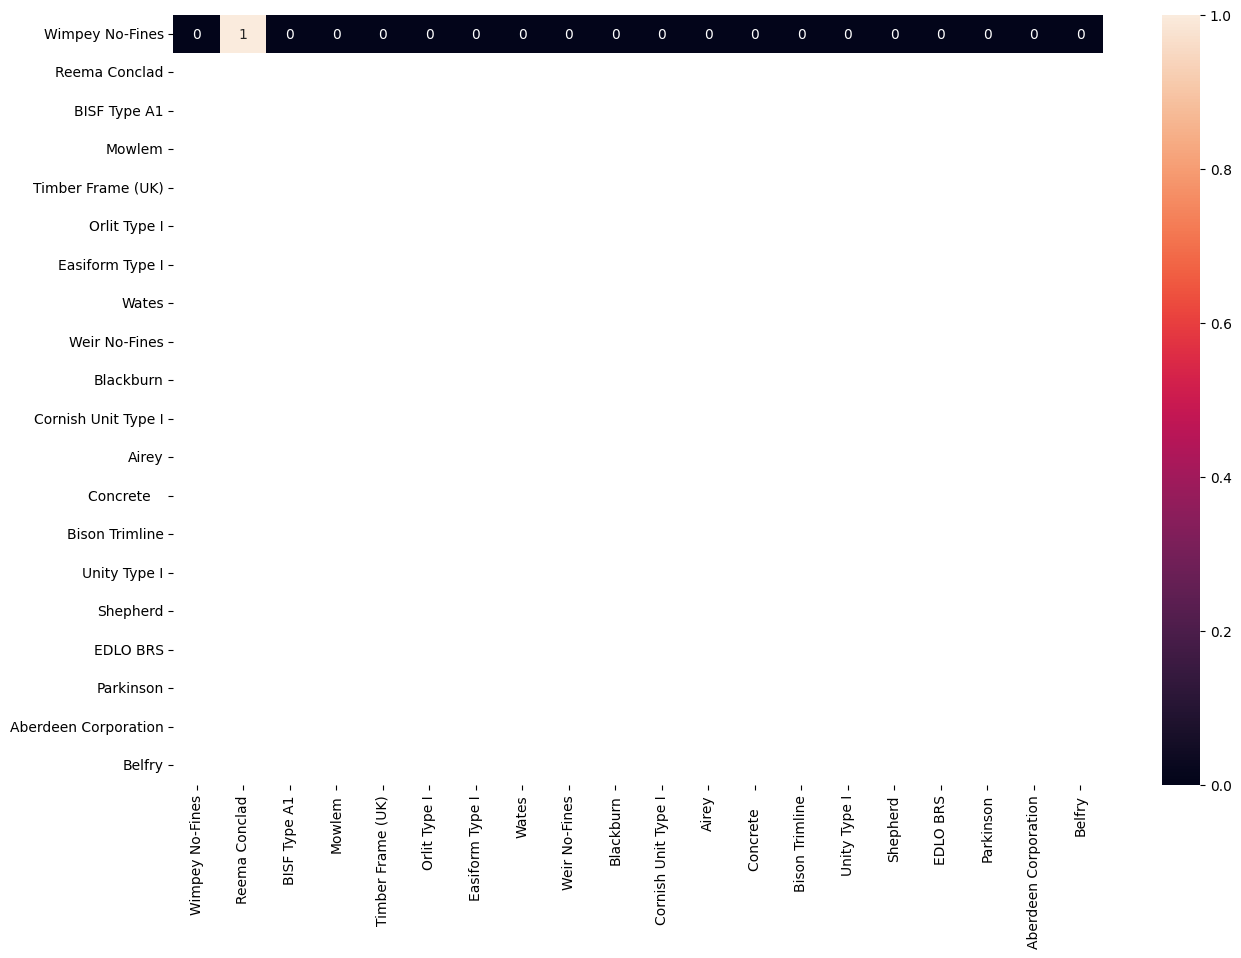

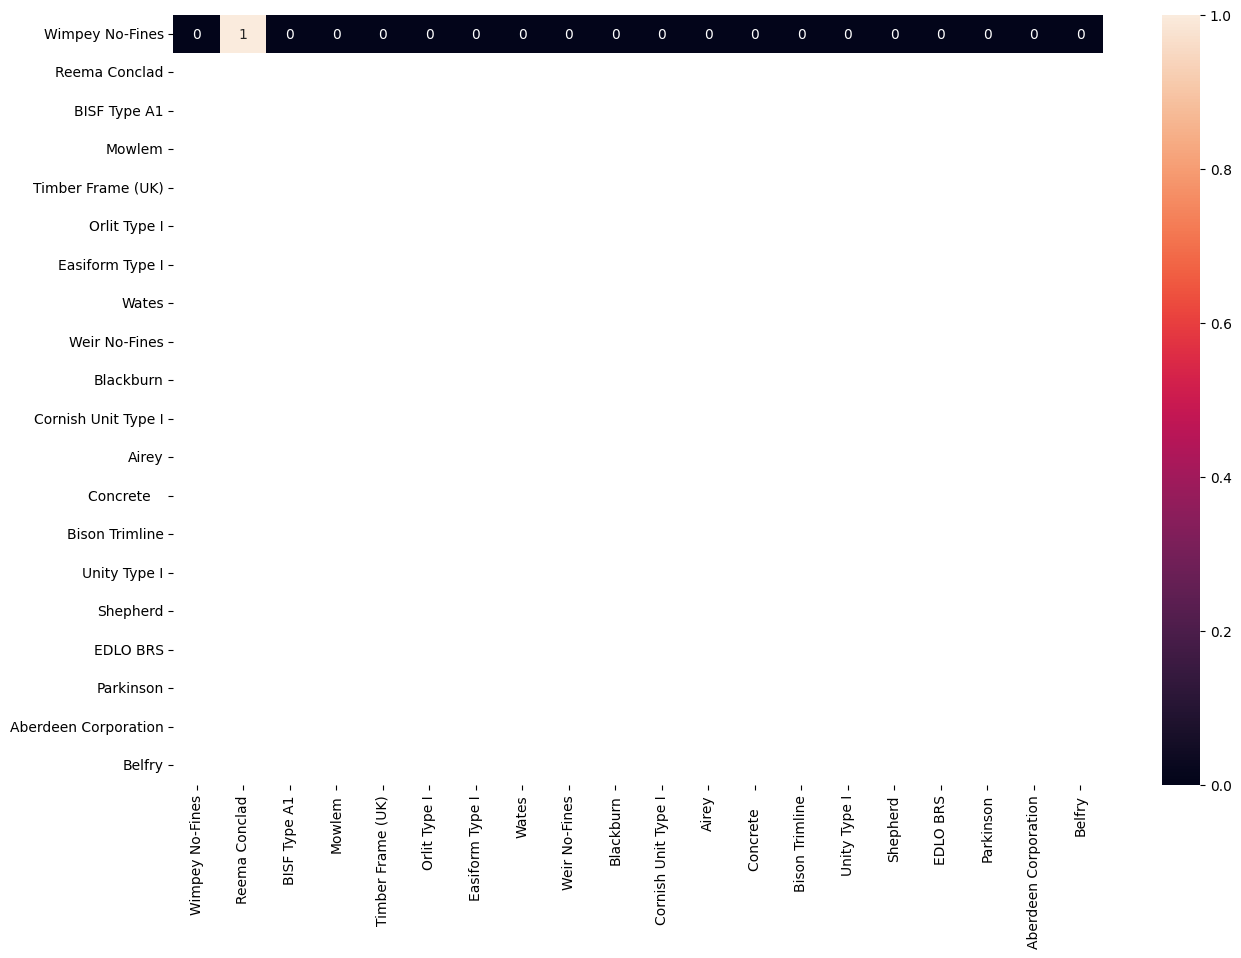

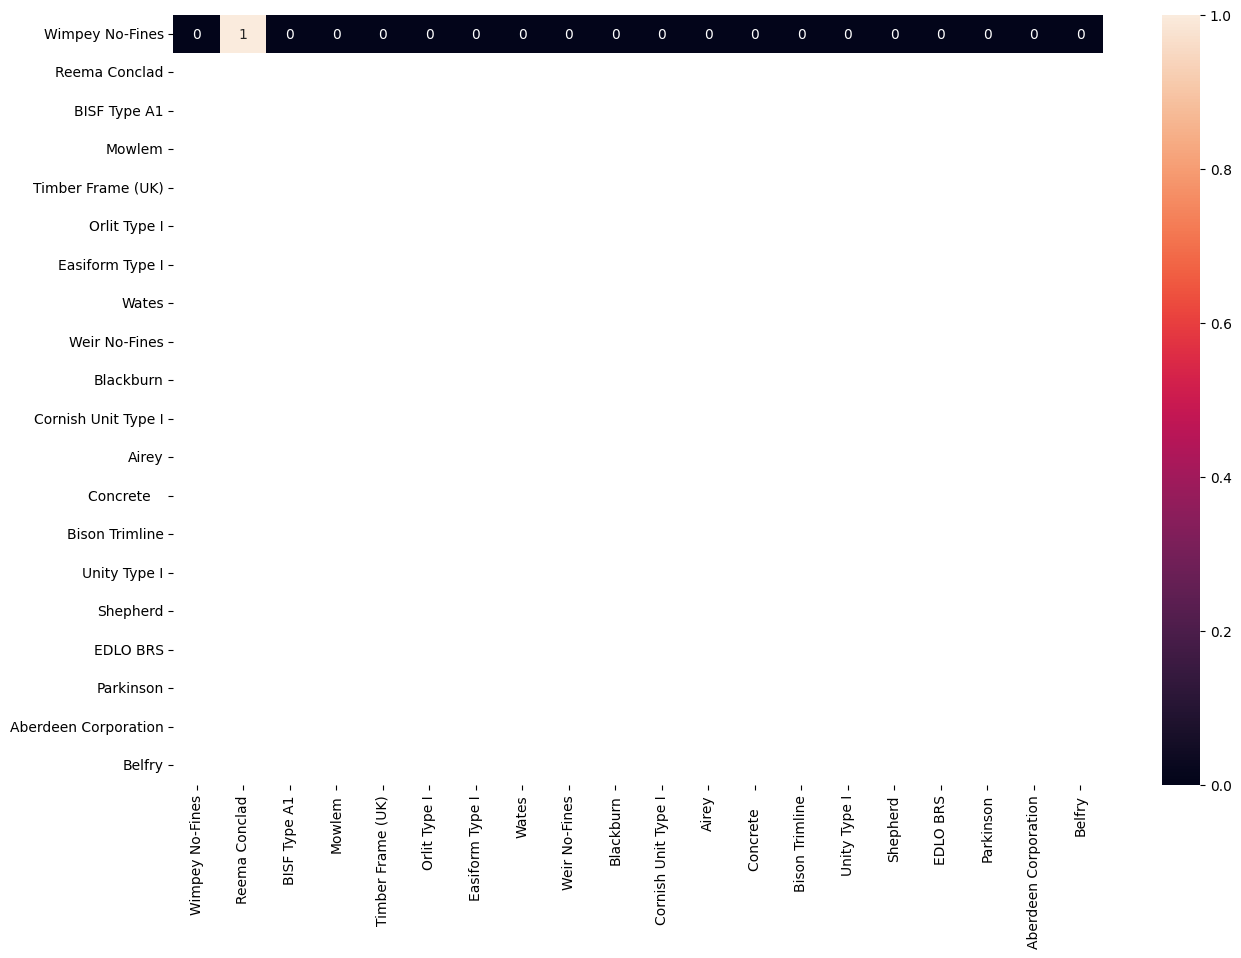

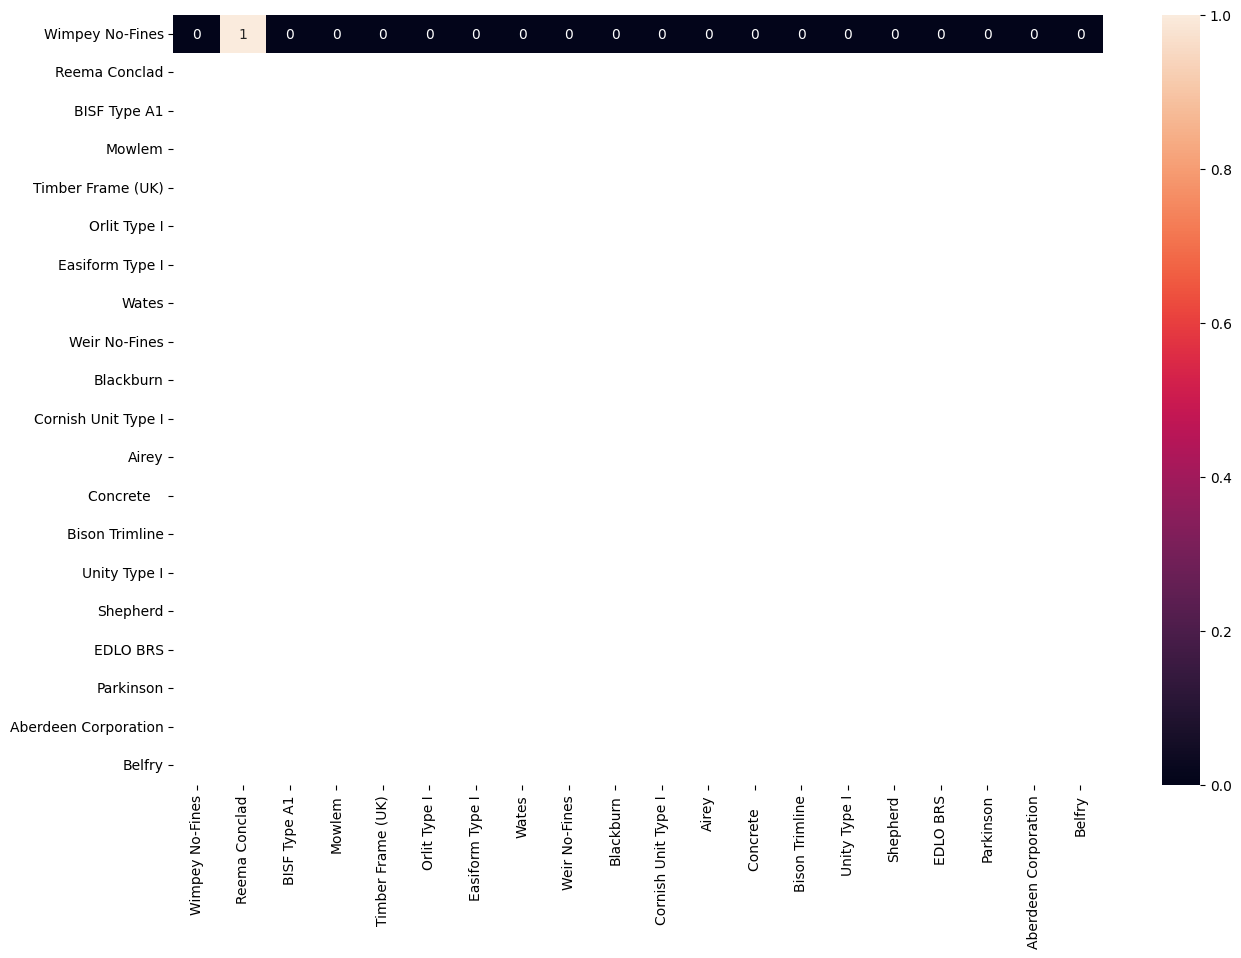

In [77]:

#fits model using datamodule provided
trainer.fit(model, dm)

In [ ]:

checkpoint_callback = ModelCheckpoint(dirpath="/content/lightning_logs/9whljbrm/checkpoints", monitor="val_acc")

trainer = pl.Trainer(callbacks=[checkpoint_callback ])
                        
# trainer.fit(model, dm)
checkpoint_callback.best_model_path

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.9/dist-packages/pytorch_lightning/loops/utilities.py:70: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(
/usr/local/lib/python3.9/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:612: UserWarning: Checkpoint directory /content/lightning_logs/xv3ia4zr/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
INFO:pytorch_lightning.callbacks.model_summary:
  | Name              | Type                      | Params
----------------------------------------------------------------
0 | accura

Num train:5457 Num val:1169 Num test:1170
Total num: 7796  total sum: 7796
Data modules for predict only
Optimise with Adam


In [78]:
#test trained model on test dataloader 
trainer.test(dataloaders = dm.test_dataloader())
# wandb.finish()

/usr/local/lib/python3.9/dist-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:148: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at ./lightning_logs/yguj74av/checkpoints/epoch=0-step=1.ckpt


Num train:4 Num val:1 Num test:2
Total num: 7  total sum: 7
Data modules for predict only


INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at ./lightning_logs/yguj74av/checkpoints/epoch=0-step=1.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │            0.5            │
│         test_jacc         │    0.02500000037252903    │
│         test_loss         │    2.7133705615997314     │
│      test_precision       │    0.02500000037252903    │
│        test_recall        │    0.05000000074505806    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 2.7133705615997314,
  'test_acc': 0.5,
  'test_recall': 0.05000000074505806,
  'test_precision': 0.02500000037252903,
  'test_jacc': 0.02500000037252903}]

In [ ]:
PATH = '/content/gdrive/MyDrive/Non_Trads_FOI/models/resnetadam.pt'
torch.save(model.state_dict(), PATH)

In [116]:

pred_dm = MyDataModule(data_dir="/content/gdrive/MyDrive/Non_Trads_FOI/data/full_svi/sandbox_images", batch_size=32, pred_only = True)
pred_dm.setup()

['Wimpey No-Fines', 'Reema Conclad', 'BISF Type A1', 'Mowlem', 'Timber Frame (UK)', 'Orlit Type I', 'Easiform Type I', 'Wates', 'Weir No-Fines', 'Blackburn', 'Cornish Unit Type I', 'Airey', 'Concrete   ', 'Bison Trimline', 'Unity Type I', 'Shepherd', 'EDLO BRS', 'Parkinson', 'Aberdeen Corporation', 'Belfry']
len samples : 11
Num train:7 Num val:1 Num test:3
Total num: 11  total sum: 11
Data modules for predict only


In [124]:


new = MyDataModule(data_dir="/content/gdrive/MyDrive/Non_Trads_FOI/data/full_svi/sandbox_images", batch_size=32, pred_only = True)
new.setup()

['Wimpey No-Fines', 'Reema Conclad', 'BISF Type A1', 'Mowlem', 'Timber Frame (UK)', 'Orlit Type I', 'Easiform Type I', 'Wates', 'Weir No-Fines', 'Blackburn', 'Cornish Unit Type I', 'Airey', 'Concrete   ', 'Bison Trimline', 'Unity Type I', 'Shepherd', 'EDLO BRS', 'Parkinson', 'Aberdeen Corporation', 'Belfry']
len samples : 11
Data modules for predict only
Pred only, num of samples = 11


In [125]:
len(pred_dm.get_dataset_samples())

11

In [127]:

pred_dm.get_dataset_samples()

[('/content/gdrive/MyDrive/Non_Trads_FOI/data/full_svi/sandbox_images/364fca6dc9306adbbc0d9186f2267b719476e3c3c242a4a4fd938_52.8409701_-3.0566352.jpg',
  '-999'),
 ('/content/gdrive/MyDrive/Non_Trads_FOI/data/full_svi/sandbox_images/ffc9cdd11598e8a58c86b4620958400677f161b49e0a38c86cf409c764e5fad8_57.160898_-2.0921577.jpg',
  '-999'),
 ('/content/gdrive/MyDrive/Non_Trads_FOI/data/full_svi/sandbox_images/ffed4e907478df2dc1c5c1225ed9c651876864b4746d852f49beb9504760c3ed_55.9619987_-3.1555193.jpg',
  '-999'),
 ('/content/gdrive/MyDrive/Non_Trads_FOI/data/full_svi/sandbox_images/fff0b88e2960e5562f66e1b74a11d0e2bd66caf55a89caf0a2a4a799e5ff8dc3_57.1723738_-2.1880164.jpg',
  '-999'),
 ('/content/gdrive/MyDrive/Non_Trads_FOI/data/full_svi/sandbox_images/fff743d1d7f9b42fa6bce096bff9b59386f40d252d2604305252554e1bc4f4d1_57.1675011_-2.1412264.jpg',
  '-999'),
 ('/content/gdrive/MyDrive/Non_Trads_FOI/data/full_svi/sandbox_images/ff76388a1f4364fca6dc9306adbbc0d9186f2267b719476e3c3c242a4a4fd938_52.8409

In [126]:

trainer.predict(model, dataloaders =  new.predict_dataloader())


Num train:4 Num val:1 Num test:2
Total num: 7  total sum: 7
Data modules for predict only


Predicting: 0it [00:00, ?it/s]

[tensor([ 1, 18, 11,  4,  4,  1, 18,  4,  4,  1,  4])]

In [128]:

for x in pred_dm.get_dataset_samples():
  print(x[0].split('/')[-1].split('_')[0]) 

364fca6dc9306adbbc0d9186f2267b719476e3c3c242a4a4fd938
ffc9cdd11598e8a58c86b4620958400677f161b49e0a38c86cf409c764e5fad8
ffed4e907478df2dc1c5c1225ed9c651876864b4746d852f49beb9504760c3ed
fff0b88e2960e5562f66e1b74a11d0e2bd66caf55a89caf0a2a4a799e5ff8dc3
fff743d1d7f9b42fa6bce096bff9b59386f40d252d2604305252554e1bc4f4d1
ff76388a1f4364fca6dc9306adbbc0d9186f2267b719476e3c3c242a4a4fd938
11598e8a58c86b4620958400677f161b49e0a38c86cf409c764e5fad8
febf927b9caeafadfdf63c59d0d895bb44bfa2f42ed5afa501a4dcdf74bdc8da
fecc86b7e1bdd02f38fc879df2a74f27a2f769f7aaba8d85981b6b4bc097112d
fecda834232980b33ffdcb0addda8dcefda5e631ff192481a6c58406b7912e82
fed006cfa12126cf5a870f548aed17a520fe551939ec5ede2d7ab977385860a2


In [92]:

dm.StreetViewData.samples

AttributeError: ignored

In [43]:
trainer.predict(model, dataloaders =dm.test_dataloader)

Num train:5457 Num val:1169 Num test:1170
Total num: 7796  total sum: 7796
Data modules for predict only


TypeError: ignored

# Make predictions with model

In [113]:
test_dm = MyDataModule('/content/gdrive/MyDrive/Non_Trads_FOI/data/full_svi/sandbox_images', batch_size = 64, pred_only = 'true')

['Wimpey No-Fines', 'Reema Conclad', 'BISF Type A1', 'Mowlem', 'Timber Frame (UK)', 'Orlit Type I', 'Easiform Type I', 'Wates', 'Weir No-Fines', 'Blackburn', 'Cornish Unit Type I', 'Airey', 'Concrete   ', 'Bison Trimline', 'Unity Type I', 'Shepherd', 'EDLO BRS', 'Parkinson', 'Aberdeen Corporation', 'Belfry']


NameError: ignored

In [ ]:


test_dm.setup()



In [ ]:
len(test_dataloader)

1

In [ ]:
data_loader = DataLoader(...)
model = MyModel()
trainer = Trainer()
predictions = trainer.predict(model, data_loader)

In [ ]:
PATH = '/content/gdrive/MyDrive/Non_Trads_FOI/models/resnetadam.pt'
model.load_state_dict(torch.load(PATH))
model.eval()
list_output=[]

for x in test_dm.test_dataloader():
   output = model(x[0])
   x = torch.argmax(output, dim=1)
   x= torch.flatten(x)
   list_output.append(x)

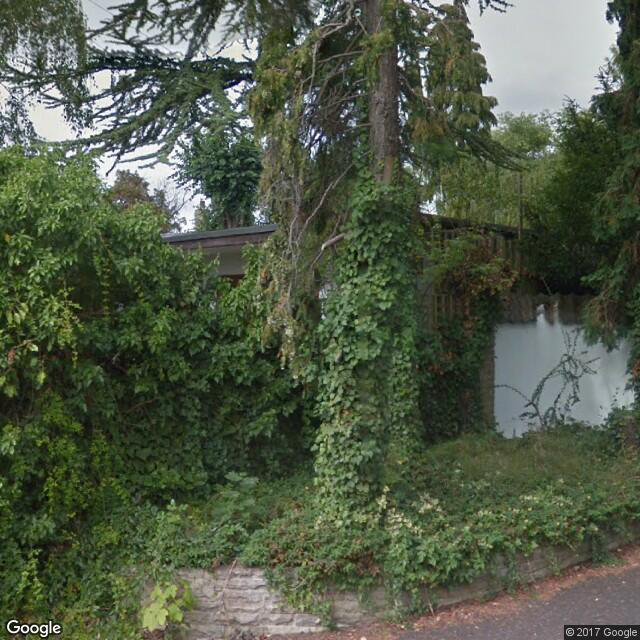

In [ ]:
from PIL import Image
f = '/content/gdrive/MyDrive/Non_Trads_FOI/data/cambridge_svi/cambridge1/0001000010181876_WMZdFfWA0C4ntRtBS5iYTw.jpg'
Image.open(f)

In [ ]:
# if model_out_path is not None:
#   torch.save(model.state_dict(), model_out_path)

In [ ]:
cdf = pd.read_csv('raw_nums.csv')
cdf.set_index('Unnamed: 0', inplace=True)

# norm =  np.sum(cdf, axis=1)
# cdf = cdf/norm



# sn.heatmap(cdf, annot=True)
# plt.figure(figsize = (25,17))



In [ ]:

cdf

In [ ]:

cdf
292+ 80 +44+14+17+24+39+9+72

In [ ]:

precision = correctly pred pos / all pred pos 
micro: true pos and false pos then calc precision 
macro: calc precision per class and average them 

In [ ]:

true_positives

In [ ]:

np.sum(cdf, axis=0)

In [ ]:

false_positives

In [ ]:

import numpy as np



# calculate true positives and false positives for each class
true_positives = np.diag(cdf)
false_positives = np.sum(cdf, axis=0) - true_positives

# calculate micro-precision
micro_precision = np.sum(true_positives) / (np.sum(true_positives) + np.sum(false_positives))

print("Micro-Precision: {:.15f}".format(micro_precision))


# calculate total correct predictions
total_correct = np.trace(cdf)

# calculate total predictions
total_predictions = np.sum(cdf).sum()

# calculate accuracy
accuracy = total_correct / total_predictions

print("Accuracy: {:.15f}".format(accuracy))


true_positives = np.diag(cdf)
false_negatives = np.sum(cdf, axis=1) - true_positives

# calculate micro-recall
micro_recall = np.sum(true_positives) / (np.sum(true_positives) + np.sum(false_negatives))

print("Micro-Recall: {:.15f}".format(micro_recall))


In [ ]:
conf_matrix = cdf
# calculate true positives and false positives for each class
true_positives = np.diag(conf_matrix)
false_positives = np.sum(conf_matrix, axis=0) - true_positives

# calculate macro-precision and micro-precision
macro_precision = np.mean(true_positives / (true_positives + false_positives))

# calculate true positives and false negatives for each class
true_positives = np.diag(conf_matrix)
false_negatives = np.sum(conf_matrix, axis=1) - true_positives

# calculate macro-recall and micro-recall
macro_recall = np.mean(true_positives / (true_positives + false_negatives))

# calculate accuracy
total_correct = np.trace(conf_matrix)
total_predictions = np.sum(conf_matrix).sum()
accuracy = total_correct / total_predictions

print("Macro-Precision: {:.4f}".format(macro_precision))
print("Macro-Recall: {:.4f}".format(macro_recall))
print("Accuracy: {:.4f}".format(accuracy))

In [ ]:
tp = 292 
fp= 39 + 22+1+4+16+2+14+4 

tp / (tp+fp)


In [ ]:

591 / 755

In [ ]:

0.7828

In [ ]:

cdf.sum(axis=1)

In [ ]:

f, ax = plt.subplots(figsize = (15,10)) 

sn.heatmap(cdf, annot=True, ax=ax)



In [ ]:


sn.heatmap(cdf, annot=True)
plt.figure(figsize = (25,17))



In [ ]:
listodx = sum(all_labels, [])


In [ ]:

dl = dm.val_dataloader()

In [ ]:

dl = dm.test_dataloader()


all_labels = []
for x in dl:
  images, labels = x
  all_labels.append(labels.tolist())

rdf = pd.DataFrame()
rdf['labels'] =  sum(all_labels, [])
rdf['name'] = [cl_dict[str(x)] for x in rdf['labels'] ]

rdf.groupby('name').count()

In [ ]:


dl = dm.val_dataloader()

all_labels = []
for x in dl:
  images, labels = x
  all_labels.append(labels.tolist())

rdf = pd.DataFrame()
rdf['labels'] =  sum(all_labels, [])
rdf['name'] = [cl_dict[str(x)] for x in rdf['labels'] ]

rdf.groupby('name').count()

In [ ]:

dl = dm.train_dataloader()

all_labels = []
for x in dl:
  images, labels = x
  all_labels.append(labels.tolist())

rdf = pd.DataFrame()
rdf['labels'] =  sum(all_labels, [])
rdf['name'] = [cl_dict[str(x)] for x in rdf['labels'] ]

rdf.groupby('name').count()

In [88]:


def extract_predictions(dm, model, output_location = None):
    #Extract the Ground truth and Predictions 
    list_output = []
    predictions = []

    test_dataloader = dm.predict_dataloader()
  

    # for batch in test_dataloader:
    #   data = sample[0]
    # print('Ground truth list created')

    test_ids = dm.samples[0]
    # print('Num of Test IDs is {}, Num of Ground Truth labels is {}'.format(len(test_ids), len(ground_truth)) )


    model.eval()
    for x in dm.test_dataloader():
      output = model(x[0])
      x = torch.argmax(output, dim=1)
      x= torch.flatten(x)
      list_output.append(x)

    for x in list_output:
      x= x.tolist()
      # print(x)
      for y in x:
        predictions.append(y)
    print('Prediction list created')

    # #create df of predictions and save 
    df = pd.DataFrame( {'TestId': test_ids , 'Preds' : predictions   })

    return df 

In [91]:

pred_dm.samples()

AttributeError: ignored

In [89]:


extract_predictions(pred_dm, model)

AttributeError: ignored

In [ ]:

test_dataset= dm.test_dataloader

for sample in test_dataset:
      label = sample[1]
      data = sample[0]

In [ ]:

test_dataset

In [ ]:
#creates predictions and if output_location not None, saves them 
extract_predictions(dm, model, base_dir)

In [ ]:
import pandas as pd
import os

In [ ]:

file_names

['0001000010179994_qthaBW-NYhzdtGxm0WcIeA.jpg',
 '0001000010180004_GVVXQckroqn5nxf-9zmktw.jpg',
 '0001000010180011_LANLhZ6Ga7weUr8ay-KMGA.jpg',
 '0001000010180010_LANLhZ6Ga7weUr8ay-KMGA.jpg',
 '0001000010180005_KNT-drpmpFaFMY_2B9MA7A.jpg',
 '0001000010180018_sikgaHxk8lImCfRA-RLOPg.jpg',
 '0001000010180007_JR8MgqCQZ2x32UnKAeyg0Q.jpg',
 '0001000010180002_WSmrZCiLgNSoJj4_ohficw.jpg',
 '0001000010180008_8dal6cZGmXt2iyFide0Y7A.jpg',
 '0001000010180006_8dal6cZGmXt2iyFide0Y7A.jpg',
 '0001000010180013_sikgaHxk8lImCfRA-RLOPg.jpg',
 '0001000010180009_8dal6cZGmXt2iyFide0Y7A.jpg',
 '0001000010180003_uF-9YdJ7jw9BJquB5_2VbA.jpg',
 '0001000010180014_JBWAus_jgmWaOvU9C7XOvQ.jpg',
 '0001000010180022_gVkdj0tvLLIod8CkjRjcPw.jpg',
 '0001000010180017_JBWAus_jgmWaOvU9C7XOvQ.jpg',
 '0001000010180016_JBWAus_jgmWaOvU9C7XOvQ.jpg',
 '0001000010180023_QI6J29uAsQ7ib_wxG0oBNQ.jpg',
 '0001000010180012_A8C3rQCia12J8luJTsK-rw.jpg',
 '0001000010180015_JBWAus_jgmWaOvU9C7XOvQ.jpg',
 '0001000010180021_KN3e4M55ouSuZC7d-PWk1

In [ ]:
toid = pd.read_csv('/content/gdrive/MyDrive/Non_Trads_FOI/data/cambridge_svi/scores_toid.csv')

# Path to the folder containing the images
folder_path = '/content/gdrive/MyDrive/Non_Trads_FOI/data/cambridge_svi/cambridge1'

# Get a list of all file names in the folder
file_names = os.listdir(folder_path)
t_ids = [ int(x.split('_')[0]) for x in file_names]

In [ ]:
# note confidence can be 1 or 0 
cam_inter_post_war_toids = toid[toid['era'].isin(['d interwar', 'e postwar']) & toid['TOID'].isin(t_ids) ].TOID

In [ ]:
cam_inter_post_war_toids

0        1000009954004
1        1000009954292
2        1000009954310
4        1000009954356
5        1000009954357
             ...      
33787    1000010181853
33788    1000010181854
33793    1000010181866
33794    1000010181871
33797    1000010181876
Name: TOID, Length: 18754, dtype: int64

In [ ]:
scd = StreetViewData("/content/gdrive/MyDrive/Non_Trads_FOI/Facades_SVI")

idx =100
idx=200
idx=2200
path  = scd.samples[idx][0]
label = scd.samples[idx][1]

sample = Image.open(path).convert("RGB")
sample.show()

width , height = sample.size

left = 170
top = 250
right = 430
bottom = 10
print(top, bottom )
im1 = sample.crop((left, bottom, right, top))







im1.show()